In [ ]:
# Nama Program : Tugas4.ipynb
# Nama         : Nazwa Nashatasya
# NPM          : 140810230019
# Tanggal Buat : Sabtu, 19 April 2025
# Deskripsi    : Tugas 4 Praktikum AI

# =====================================================================================================
# Membangun sebuah model Neural Network untuk klasifikasi dataset Horse or Human dalam binary classes.

# Input layer harus menerima 150x150 dengan 3 bytes warna sebagai input shapenya.
# Jangan menggunakan lambda layers dalam model.

# Dataset yang digunakan dibuat oleh Laurence Moroney (laurencemoroney.com).

# Standar yang harus dicapai untuk accuracy dan validation_accuracy > 83%
# =====================================================================================================

In [ ]:
import sys
!"{sys.executable}" -m pip install pillow
!"{sys.executable}" -m pip install scipy
!"{sys.executable}" -m pip install matplotlib

In [1]:

# Import library yang diperlukan
import urllib.request       # Untuk mengunduh dataset dari URL
import zipfile              # Untuk mengekstrak file zip
import tensorflow as tf     # Untuk membangun model neural network
import os                   # Untuk mengelola file dan direktori    
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Untuk augmentasi data gambar
from tensorflow.keras.optimizers import RMSprop                     # Untuk optimasi model   
from tensorflow.keras.callbacks import EarlyStopping                # Untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan
import matplotlib.pyplot as plt                                     # Untuk visualisasi hasil pelatihan model   

# Variabel global untuk menyimpan history
history_global = None

In [2]:
def solution_05():
    # Step 1 : Unduh dataset Horse or Human
    data_url_1 = 'https://github.com/dicodingacademy/assets/releases/download/release-horse-or-human/horse-or-human.zip'
    urllib.request.urlretrieve(data_url_1, 'horse-or-human.zip') # Unduh file zip
    local_file = 'horse-or-human.zip' 
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/horse-or-human')   # Ekstrak file zip

    # Step 2 : Unduh dataset Validation Horse or Human
    data_url_2 = 'https://github.com/dicodingacademy/assets/raw/main/Simulation/machine_learning/validation-horse-or-human.zip'
    urllib.request.urlretrieve(data_url_2, 'validation-horse-or-human.zip') # Unduh file zip
    local_file = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_file, 'r')
    zip_ref.extractall('data/validation-horse-or-human')    # Ekstrak file zip
    zip_ref.close()
    
    # Step 3 : Buat direktori untuk menyimpan dataset
    TRAINING_DIR = 'data/horse-or-human'
    VALIDATION_DIR = 'data/validation-horse-or-human'

    # Step 4 : Buat generator untuk augmentasi gambar
    train_datagen = ImageDataGenerator(
        rescale=1/255,
        rotation_range=40,
        horizontal_flip=True,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest'
    )

    # Step 5 : Buat generator untuk validasi gambar
    validation_datagen = ImageDataGenerator(rescale=1/255)

    # Step 6 : Buat generator untuk training data
    train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(150, 150), # Ukuran gambar 150x150
        batch_size=32,
        class_mode='binary' # Klasifikasi biner (Horse or Human)
    )

    # Step 7 : Buat generator untuk validasi data
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(150, 150), # Ukuran gambar 150x150
        batch_size=32,
        class_mode='binary' # Klasifikasi biner (Horse or Human)
    )
    
    # Step 8 : Buat model Sequential (Conv2D, MaxPooling2D, Flatten, Dropout, dan Dense)
    model = tf.keras.models.Sequential([
        # Input layer untuk menerima gambar dengan ukuran 150x150 dan 3 channel warna
        tf.keras.layers.Input(shape=(150, 150, 3)),
        
        # Layer konvolusi 1 dengan 16 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Layer konvolusi 2 dengan 32 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU   
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Layer konvolusi 3 dengan 64 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        # Layer konvolusi 4 dengan 128 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        # Layer Flatten untuk mengubah output 2D menjadi 1D
        tf.keras.layers.Flatten(),

        # Dropout layer untuk mengurangi overfitting
        tf.keras.layers.Dropout(0.4),
        
        # Fully connected layer (dense)
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Output layer dengan 1 neuron dan fungsi aktivasi sigmoid untuk klasifikasi biner
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Step 9 : Kompilasi model dengan loss function binary_crossentropy, optimizer RMSprop, dan metrics accuracy
    model.compile(
        loss='binary_crossentropy',
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    
    # Step 10 : Buat EarlyStopping untuk menghentikan pelatihan jika tidak ada peningkatan dalam 4 epoch
    early_stop = EarlyStopping(
        monitor='val_accuracy',
        patience=4,
        restore_best_weights=True
    )

    # Step 11 : Latih model dengan data training dan validasi (Gunakan 20 epoch untuk pelatihan)
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[early_stop],
        verbose=1
    )
    
    global history_global
    history_global = history

    return model

In [3]:
# Step 12 : Simpan model ke dalam file model_05.h5
if __name__ == '__main__':
    # DO NOT CHANGE THIS CODE
    model = solution_05()
    model.save("model_05.h5")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


c:\Users\Nazwa Nashatasya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6279 - loss: 0.6333

c:\Users\Nazwa Nashatasya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.6305 - loss: 0.6313 - val_accuracy: 0.8438 - val_loss: 0.4059
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8545 - loss: 0.3623 - val_accuracy: 0.7930 - val_loss: 1.7996
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.9139 - loss: 0.2153 - val_accuracy: 0.7812 - val_loss: 1.6037
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9461 - loss: 0.1310 - val_accuracy: 0.7578 - val_loss: 1.7127
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 715ms/step - accuracy: 0.9440 - loss: 0.1457 - val_accuracy: 0.6211 - val_loss: 3.9174


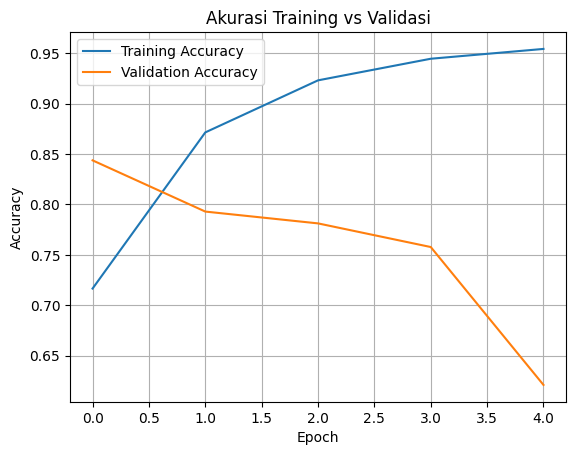

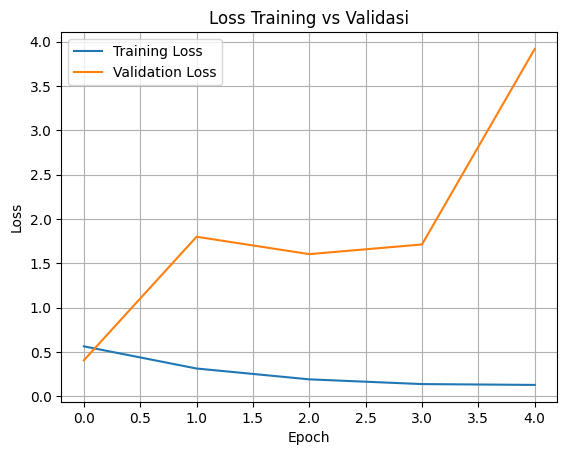

In [4]:
def plot_history(history):
    # Plot akurasi
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Akurasi Training vs Validasi')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Training vs Validasi')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Panggil plotting setelah training
plot_history(history_global)